In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load and Explore the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("C:/Projetos/project-data-exploration/student_habits_performance.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [5]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [6]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [7]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Exploratory analysis (EDA)

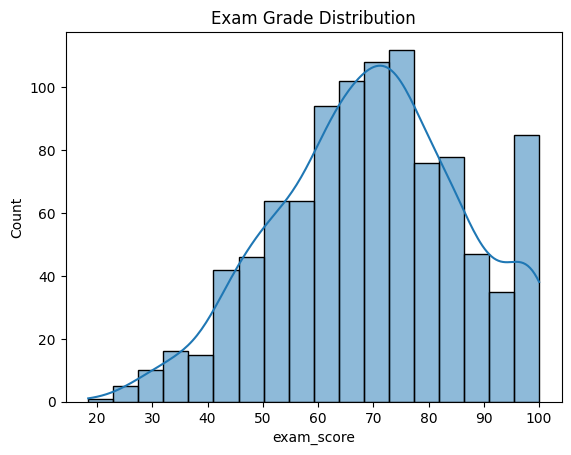

In [8]:
# Distributions

sns.histplot(df['exam_score'], kde=True)
plt.title('Exam Grade Distribution')
plt.show()


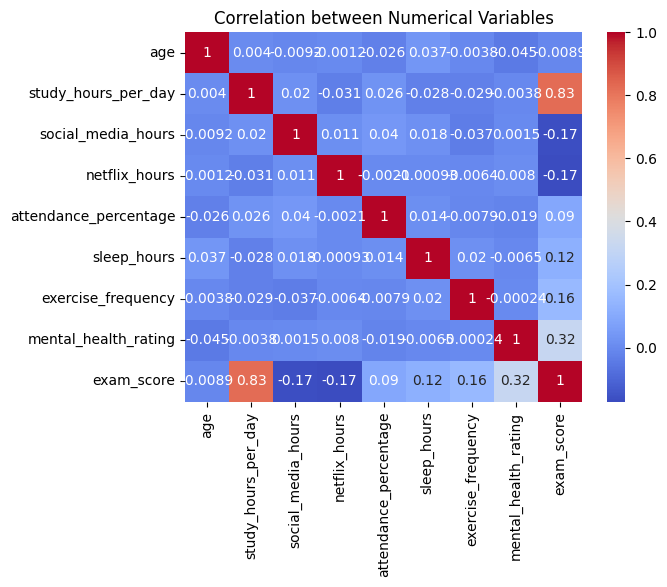

In [9]:
# Correlation between Numerical Variables

plt.Figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation between Numerical Variables')
plt.show()

Views based on Heatmap information

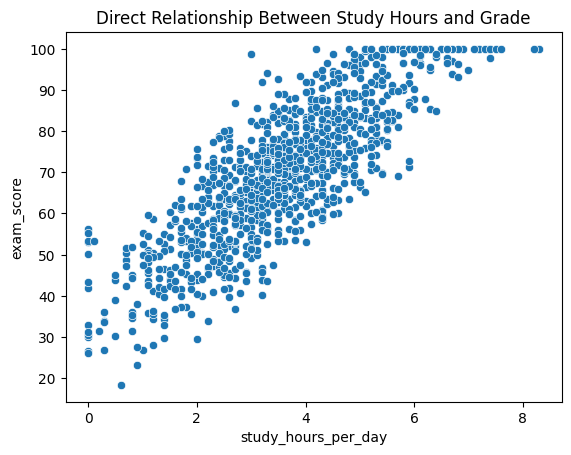

In [10]:
# Direct relationship between study hours and grade
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Direct Relationship Between Study Hours and Grade')
plt.show()

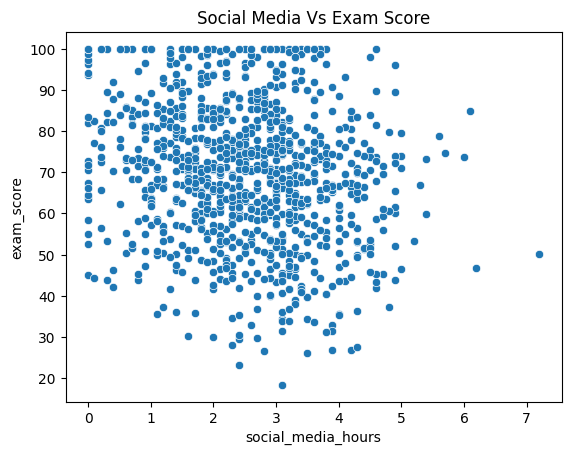

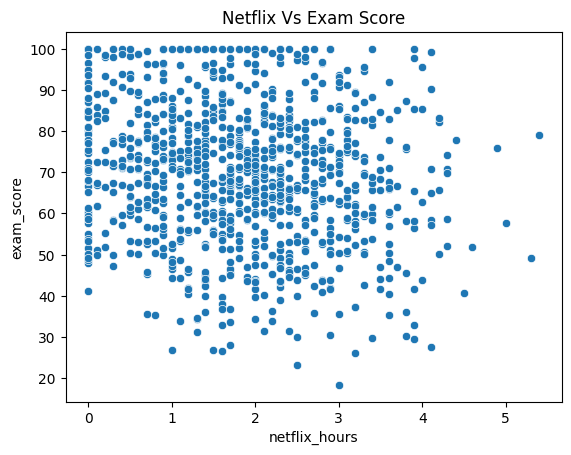

In [11]:
# Social Media and Netflix
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Social Media Vs Exam Score')
plt.show()

sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Netflix Vs Exam Score')
plt.show()

Netflix x Social Media x Exam Score

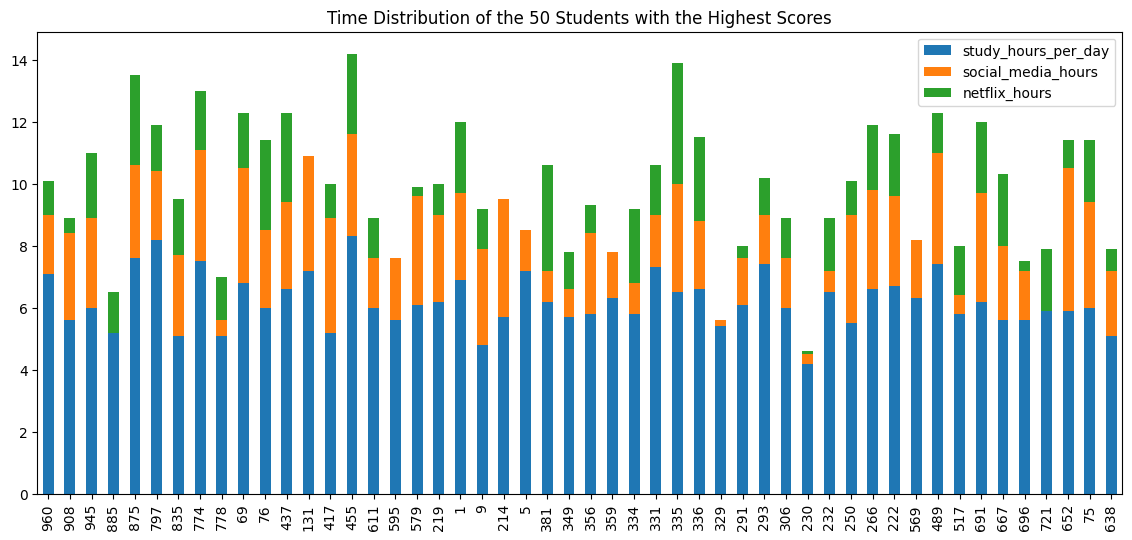

In [12]:
df_sorted = df.sort_values(by='exam_score', ascending=False).head(50)
df_sorted[['study_hours_per_day', 'social_media_hours', 'netflix_hours']].plot(
    kind='bar', stacked=True, figsize=(14, 6), legend=True
)
plt.title('Time Distribution of the 50 Students with the Highest Scores')
plt.show()

In [18]:
overall_mean = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours']].mean()

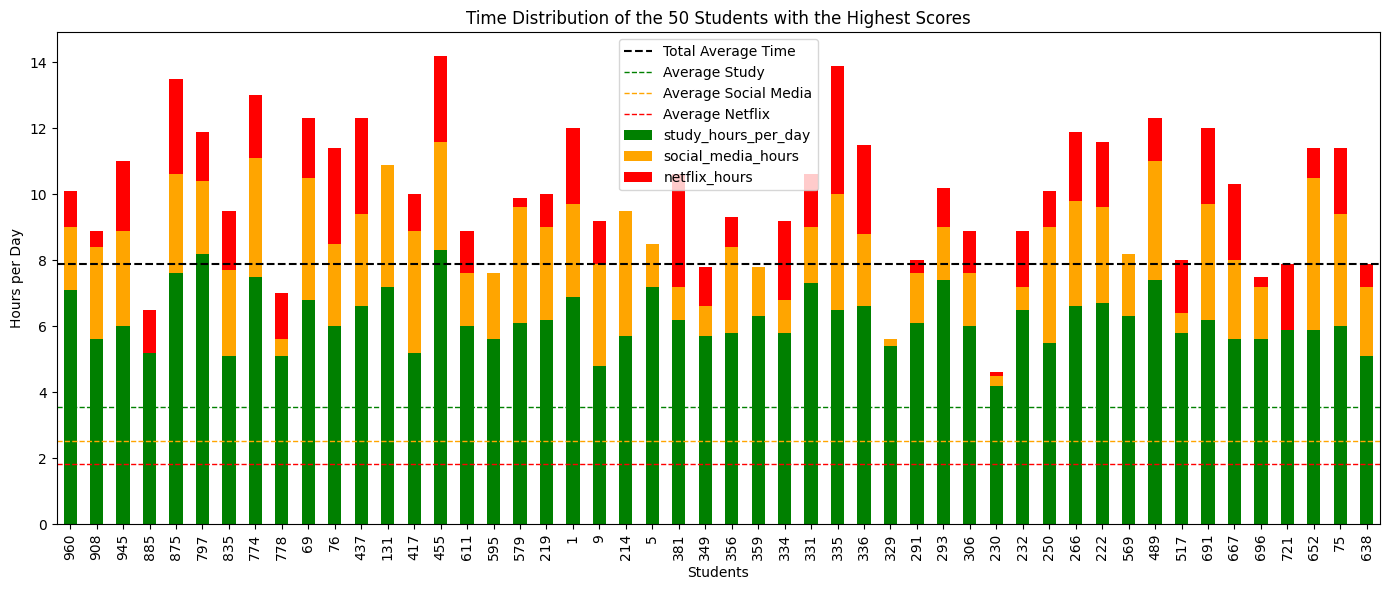

In [19]:
df_sorted = df.sort_values(by='exam_score', ascending=False).head(50)

ax = df_sorted[['study_hours_per_day', 'social_media_hours', 'netflix_hours']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    legend=True,
    color=['green', 'orange', 'red']
)

plt.title('Time Distribution of the 50 Students with the Highest Scores')
plt.ylabel('Hours per Day')
plt.xlabel('Students')

plt.axhline(y=overall_mean.sum(), color='black', linestyle='--', linewidth=1.5, label='Total Average Time')
plt.axhline(y=overall_mean['study_hours_per_day'], color='green', linestyle='--', linewidth=1, label='Average Study')
plt.axhline(y=overall_mean['social_media_hours'], color='orange', linestyle='--', linewidth=1, label='Average Social Media')
plt.axhline(y=overall_mean['netflix_hours'], color='red', linestyle='--', linewidth=1, label='Average Netflix')

plt.legend()
plt.tight_layout()
plt.show()


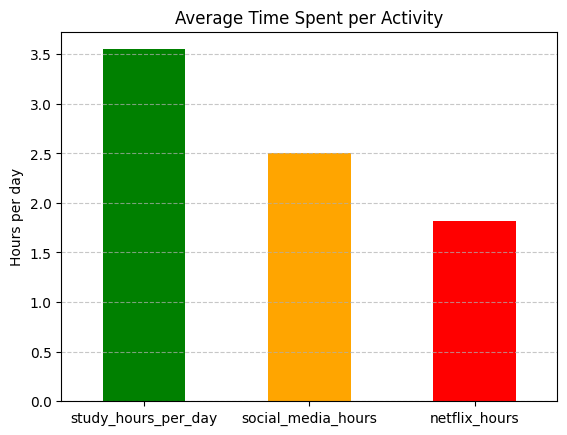

In [20]:
df[['study_hours_per_day', 'social_media_hours', 'netflix_hours']].mean()
mean_time = df[['study_hours_per_day', 'social_media_hours', 'netflix_hours']].mean()

mean_time.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Average Time Spent per Activity')
plt.ylabel('Hours per day')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

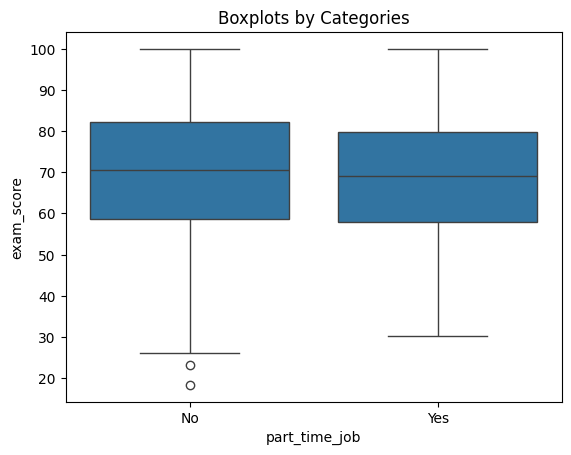

In [ ]:
# Boxplots by Categories

sns.boxplot(x='part_time_job', y='exam_score', data = df)
plt.title('Boxplots by Categories')
plt.show()

Data Preprocessing

In [14]:
# Defining features X and target Y

X = df.drop(columns=['exam_score', 'student_id']) # removing the ID and the target
y = df['exam_score']

In [ ]:
# Separate numeric and categorical columns

numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Create a transformer for each type

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first'), categorical)
])

Training/testing Division

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

Linear Regression

In [19]:
pipeline_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('regressor', LinearRegression())])

Random Forest

In [20]:
pipeline_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'study_hours_per_day',
                                                   'social_media_hours',
                                                   'netflix_hours',
                                                   'attendance_percentage',
                                                   'sleep_hours',
                                                   'exercise_frequency',
                                                   'mental_health_rating']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'part_time_job',
                                                   'diet_quality',
                                                   'parental_education_level',
                                                   'internet_quality',
                                                   'extracurricular_participation'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Model Evaluation

In [21]:
# Predictions

y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

In [27]:
# Metrics

def avaliar_modelo(y_test, y_pred, nome):
    print(f"📊 {nome}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print("")

avaliar_modelo(y_test, y_pred_lr, "Regressão Linear")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")


📊 Regressão Linear
R²: 0.90
MAE: 4.19

📊 Random Forest
R²: 0.85
MAE: 4.94

